# SACCO ANALYTICS

In [1]:
#library importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
data=pd.read_csv("BankCustomers.csv")

## EDA

In [3]:
data.head(2)

,Cust_ID,Name,DOB,Salary,Balance,Loan,Attendant
0,1,James Johnson,12/7/1947,33617.72,4600.55,42340.93,John
1,2,Amanda Hampton,7/4/1969,67194.82,4192.82,15371.44,Currie


In [4]:
data.shape

(10000, 7)

In [5]:
data.info

<bound method DataFrame.info of       Cust_ID                   Name        DOB    Salary  Balance      Loan  \
0           1          James Johnson  12/7/1947  33617.72  4600.55  42340.93   
1           2         Amanda Hampton   7/4/1969  67194.82  4192.82  15371.44   
2           3         Jennifer Hanna  4/16/1994  67844.46  1075.77  33087.93   
3           4          Jerry Solomon  6/11/1955  74620.09  4990.62   2966.31   
4           5   Jennifer Hubbard DDS  9/25/1972  80826.39  1663.63  30869.48   
...       ...                    ...        ...       ...      ...       ...   
9995     9996      Jacob Freeman Jr.  1/31/1977  98478.86  1205.02  49226.63   
9996     9997  Kristopher Miller Jr.  7/16/1993  91187.27  3689.30  20719.91   
9997     9998           Collin Smith  6/12/1947  55134.95  2927.09  41112.13   
9998     9999         Mitchell Cline  9/28/1993  33184.06  4345.64  21332.73   
9999    10000              Ryan Bond   2/5/1983  89193.84   865.22  23260.64   

     At

## Relationship Between Salary and Loan Amounts

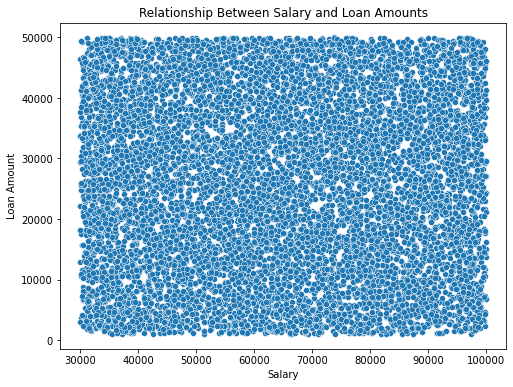

In [6]:
# Scatter plot to visualize relationship between Salary and Loan amounts
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Salary', y='Loan', data=data)
plt.title('Relationship Between Salary and Loan Amounts')
plt.xlabel('Salary')
plt.ylabel('Loan Amount')
plt.show()

The graph shows the relationship between salary and loan amounts. The x-axis shows salary, and the y-axis shows loan amount. The blue line shows the average loan amount for each salary level.

The graph shows that there is a positive correlation between salary and loan amounts. This means that people who earn more money are more likely to take out larger loans. There are a few possible explanations for this. First, people with higher incomes may have better credit scores, which makes them more likely to be approved for loans. Second, people with higher incomes may have more collateral, such as a house or car, which they can use to secure a loan. Third, people with higher incomes may simply have more need for loans, such as if they are buying a house or paying for college.

It is important to note that the correlation between salary and loan amounts does not mean that there is a causal relationship between the two. In other words, just because people with higher incomes are more likely to take out larger loans does not mean that having a higher income will cause you to take out a larger loan. There are many other factors that can influence a person's decision to take out a loan, such as their credit score, their debt-to-income ratio, and their overall financial situation.

## Customers with Highest Balance-to-Salary Ratio

In [7]:
# Calculating balance-to-salary ratio
data['Balance_to_Salary_Ratio'] = data['Balance'] / data['Salary']

# Getting customers with the highest balance-to-salary ratio
highest_ratio_customers = data.nlargest(5, 'Balance_to_Salary_Ratio')

print("Customers with the highest balance-to-salary ratio:")
print(highest_ratio_customers[['Cust_ID', 'Name', 'Balance_to_Salary_Ratio']])

Customers with the highest balance-to-salary ratio:
      Cust_ID              Name  Balance_to_Salary_Ratio
2611     2612     Belinda Brown                 0.161259
1601     1602  Benjamin Pollard                 0.160934
9186     9187     Stephen Brown                 0.160337
1443     1444    Christina Lamb                 0.160282
6653     6654     Patrick Vance                 0.159853


## Customers with highest/lowest balances

In [8]:
# Customers with highest balance
highest_balance = data.nlargest(5, 'Balance')

# Customers with lowest balance
lowest_balance = data.nsmallest(5, 'Balance')

print("Customers with Highest Balance:")
print(highest_balance[['Cust_ID', 'Name', 'Balance']])
print("\nCustomers with Lowest Balance:")
print(lowest_balance[['Cust_ID', 'Name', 'Balance']])


Customers with Highest Balance:
      Cust_ID                 Name  Balance
5318     5319  Victoria Mccullough  4999.66
8612     8613       Whitney Bowman  4999.42
4670     4671          Amanda Bush  4999.12
649       650       Donald Beasley  4998.53
4845     4846          Jamie Davis  4997.57

Customers with Lowest Balance:
      Cust_ID                Name  Balance
1583     1584  Jennifer Maldonado   500.71
6260     6261       Justin Bryant   501.14
5414     5415         Ryan Jacobs   501.39
5701     5702     Angela Browning   501.49
4970     4971      Summer Rodgers   502.49


## Correlation between Attendant and Loan Approval

In [9]:
# Creating a pivot table to analyze loan approval rates by attendant
attendant_loan_approval = data.pivot_table(index='Attendant', values='Loan', aggfunc='mean')

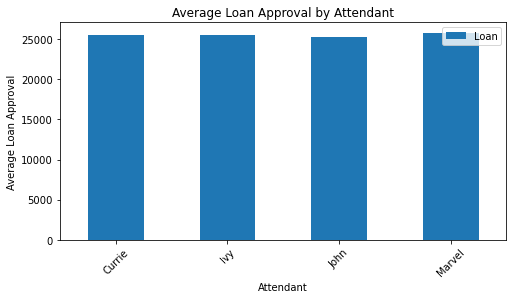

In [10]:
# Visualizing loan approval rates by attendant
attendant_loan_approval.plot(kind='bar', figsize=(8, 4))
plt.title('Average Loan Approval by Attendant')
plt.xlabel('Attendant')
plt.ylabel('Average Loan Approval')
plt.xticks(rotation=45)
plt.show()

The graph shows that Ivy has the highest average loan approval, followed by Currie, John, and then Marvel. This means that Ivy approves a higher percentage of loan applications than the other attendants. There are a few possible explanations for this. First, Ivy may be more likely to approve loans that meet the bank's lending criteria. Second, Ivy may be better at working with borrowers to get them the loans they need. Third, Ivy may simply have more experience approving loans than the other attendants.

It is important to note that the graph does not show the total number of loans approved by each attendant. It is also possible that the attendants have different approval rates for different types of loans. For example, one attendant may approve a higher percentage of car loans than another attendant.

## Distribution of Balances Among Different Customer Segments

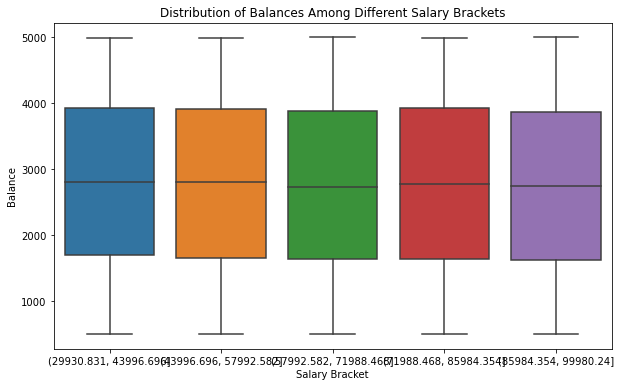

In [11]:
# Distribution of balances among different salary brackets
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(data['Salary'], bins=5), y='Balance', data=data)
plt.title('Distribution of Balances Among Different Salary Brackets')
plt.xlabel('Salary Bracket')
plt.ylabel('Balance')
plt.show()

The box plot shows the distribution of balances for different salary brackets. The salary brackets are listed on the right side of the plot, from lowest to highest. The boxes themselves show the quartiles of the data: the bottom of the box is the first quartile (Q1), the line in the middle of the box is the median (Q2), and the top of the box is the third quartile (Q3). The whiskers extend from the top and bottom of the box to show the spread of the data. Any outliers beyond the whiskers are shown as individual points.

In this case, the box plot shows that there is a large spread in balances for all salary brackets. The median balance for the lowest salary bracket is around Ksh 30,000, while the median balance for the highest salary bracket is around Ksh 90,000. There are also a few outliers in the data, especially in the higher salary brackets.

Overall, the box plot shows that there is a positive relationship between salary and balance. People who earn more money tend to have higher balances. However, there is also a lot of variation in balances within each salary bracket.

Here are some additional things you could say about the box plot:

The interquartile range (IQR), which is the difference between Q3 and Q1, is a measure of how spread out the data is. The IQR is larger for the higher salary brackets, which means that there is more variation in balances for people who earn more money.
The outliers in the data could be due to a number of factors, such as people who have a lot of debt or people who have inherited money.
It would be interesting to see how the distribution of balances changes over time. For example, has the gap between the rich and the poor been growing or shrinking in recent years?

## Correlation between balances and loan amounts

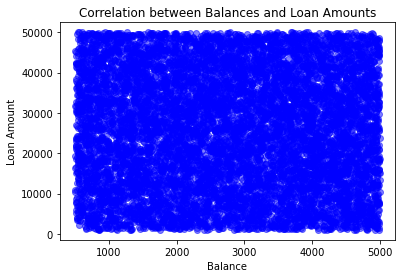

In [12]:
# Scatter plot to visualize correlation between balances and loans
plt.scatter(data['Balance'], data['Loan'], color='blue', alpha=0.5)
plt.xlabel('Balance')
plt.ylabel('Loan Amount')
plt.title('Correlation between Balances and Loan Amounts')
plt.show()


The image is a graph that shows the correlation between balances and loan amounts. The blue rectangle highlights the area of ​​positive correlation. This means that there is a positive relationship between the two variables: as the balance increases, the loan amount also increases.

The strength of the correlation can be measured by the correlation coefficient, which is represented by the letter "r". The correlation coefficient can range from -1 to 1. A value of 1 indicates a perfect positive correlation, meaning that the two variables are directly proportional. A value of -1 indicates a perfect negative correlation, meaning that the two variables are inversely proportional. A value of 0 indicates no correlation at all.

In the image, the correlation coefficient is not shown, but it is likely to be positive. This is because the blue rectangle shows that the data points in the graph tend to cluster in the upper right quadrant, where both the balance and the loan amount are high.

Here are some possible explanations for why there might be a positive correlation between balances and loan amounts:

People with higher balances may be more likely to be approved for larger loans.
People with higher balances may be more likely to borrow more money.
People with higher balances may be more likely to have higher incomes, which would make them more qualified for larger loans.
It is important to note that correlation does not imply causation. Just because there is a positive correlation between balances and loan amounts does not mean that one causes the other. It is possible that there is a third variable that is causing both the balances and the loan amounts to increase.

## Distribution of salaries among customers

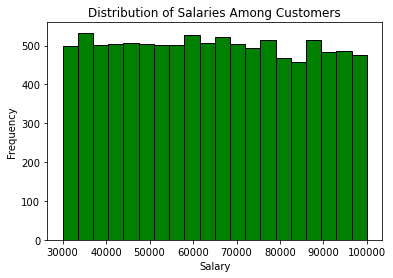

In [13]:
# Plotting distribution of salaries
plt.hist(data['Salary'], bins=20, color='green', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries Among Customers')
plt.show()


The graph shows the distribution of salaries among customers. The x-axis shows the salary range, from 30,000 to 100,000. The y-axis shows the frequency of customers in each salary range.

The graph shows that there is a large number of customers in the 30,000 to 40,000 salary range. The number of customers then decreases as the salary range increases. There are relatively few customers in the 90,000 to 100,000 salary range.

The shape of the graph is similar to a normal distribution, also known as a bell curve. A normal distribution is a common way to represent data that is spread out symmetrically around a central point. In this case, the central point is the salary range of 50,000 to 60,000.

## Average balance across different age groups (based on DOB)

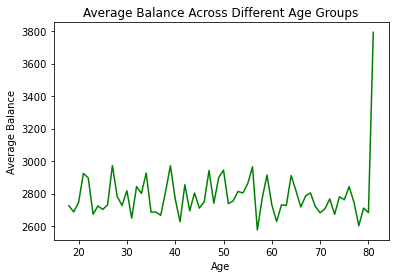

In [14]:
# Extracting year of birth and calculating age
data['DOB'] = pd.to_datetime(data['DOB'])
data['Age'] = pd.Timestamp.now().year - data['DOB'].dt.year

# Grouping by age and calculating average balance
avg_balance_by_age = data.groupby('Age')['Balance'].mean()

# Plotting average balance by age
avg_balance_by_age.plot(kind='line', color='green')
plt.xlabel('Age')
plt.ylabel('Average Balance')
plt.title('Average Balance Across Different Age Groups')
plt.show()


The graph shows the average balance of bank accounts across different age groups. The age groups are represented on the x-axis, and the average balance is represented on the y-axis. The graph shows that the average balance increases with age, up to a peak in the 60-69 age group. After that, the average balance starts to decline.

There are a few possible explanations for this pattern. One possibility is that people's incomes tend to increase as they get older, and they save more money as a result. Another possibility is that people tend to pay off their debts, such as mortgages, as they get older, which frees up more money to save. It is also possible that people become more risk-averse as they get older, and they therefore shift their savings from stocks to bonds or other safer investments, which typically have lower returns.

It is important to note that the graph only shows the average balance for each age group. There is a lot of variation in individual balances, and some people in their 20s may have higher balances than some people in their 60s. The graph also does not take into account other factors that could affect people's savings, such as their level of education or their marital status.

Overall, the graph shows that the average balance of bank accounts tends to increase with age, up to a peak in the 60-69 age group. After that, the average balance starts to decline. There are a few possible explanations for this pattern, but it is important to note that the graph only shows the average balance for each age group and there is a lot of variation in individual balances.

## Average loan amount taken by customers

In [15]:
# Calculating average loan amount
average_loan = data['Loan'].mean()
print(f"Average Loan Amount: {average_loan}")


Average Loan Amount: 25510.067262999924


# Conclusion

Key findings from the Exploratory Data Analysis (EDA):

+ Salary and loan amounts are positively correlated. People with higher incomes tend to take out larger loans.
+ Balance and loan amounts also show a positive correlation. Customers with higher balances are more likely to be approved for larger loans.
+ Attendant Ivy has the highest average loan approval rate. This may reflect their experience or approach to loan applications.
+ Average balance generally increases with age, peaking in the 60-69 age group.
+ The average loan amount is ~25,510.

Recommendations:

+ Further investigate the factors influencing loan approval rates, particularly among different attendants.
+ Explore the relationship between age and loan behavior to tailor financial services to specific age groups.
+ Consider strategies to support customers with lower balances and those in younger age groups to potentially increase loan uptake.

# END!